# HW4 Computing Problem 1

In [1]:
%% Q1
clc; cla; clf; clear all; close all; % Initial Clean-up for multiple tries
iptsetpref('ImshowBorder', 'tight');format compact;    % Set preferences

In [2]:
M = 64;
P = 64;
N = 3;
x = (0:M-1)'/M;
t = (0:P-1)/P;

In [3]:
size(x)

ans =
    64     1


In [4]:
size(t)

ans =
     1    64


In [5]:
f = 0;
for k = 1:N
    f = f+1/N*1/k*sin(k*(x-t));
end

In [6]:
size(f)

ans =
    64    64


#### Original data

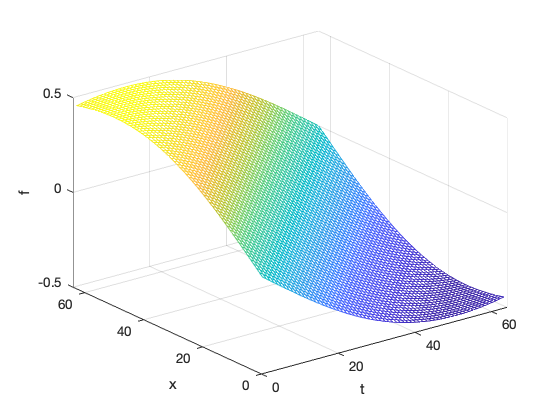

In [7]:
mesh(f)
xlabel('t')
ylabel('x')
zlabel('f')

#### creating the mask of 10% missing

In [8]:
m = (floor(rand(M,P)*10)>0);

In [9]:
sum(m(:))/64^2

ans =
    0.9060


#### r the recovered vector. But originally gappy with 10% missing

In [10]:
r = f.*m;

In [11]:
size(r)

ans =
    64    64


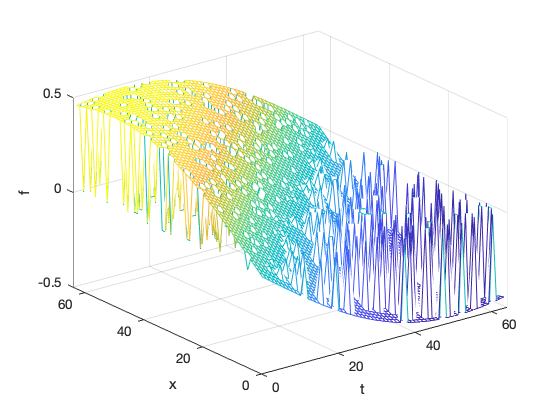

In [12]:
mesh(r)
xlabel('t')
ylabel('x')
zlabel('f')

#### estimate the missing by taking ensemble average 

In [13]:
for i = 1:P
    for j = 1:M
        if (m(j,i)==0)
            r(j,i) = sum(f(j,:).*m(j,:))/sum(m(j,:));
        end
    end
end

#### bring the missing values to non-zero values, but still rough

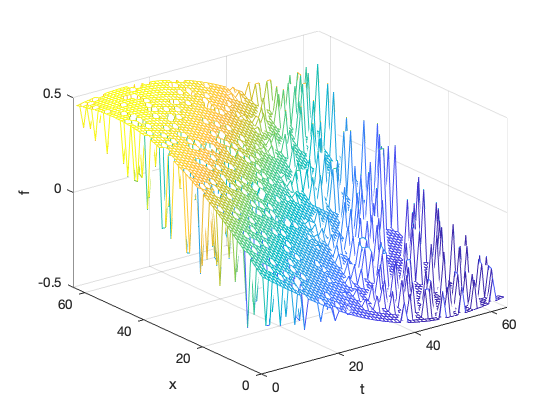

In [14]:
mesh(r)
xlabel('t')
ylabel('x')
zlabel('f')

In [15]:
r1=r;

In [16]:
update = 1;
eps = 1e-3;
it = 0;
while (update>eps && it<50)
    
    r_old = r;
    [v, e] = eig(r*r');
    ev(it+1,:) = diag(e);

    D = 2;
    %KL basis
    v = v(:,end-D:end);
    for i = 1:P
        %Mij = (phi_i,phi_j)m
        A = (v.*m(:,i))'*(v.*m(:,i));
        %fi = (x_tilde,phi_i)m
        b = (v.*m(:,i))'*r(:,i);
        %a=M_inv f
        a = A\b;
        %XD = ai phi_i
        f(:,i) = v*a;
    end
    %fill with xD at missing places
    for i = 1:P
        for j = 1:M
            if (m(j,i)==0)
                r(j,i) = f(j,i);
            end
        end
    end  
    
    if it == 0
        r1_iter=r;
    end
    %check the update for convergence threshold
    update = norm(r_old-r);
    it = it+1;
end

#### Looks like D=3 provides the best approximation

In [17]:
it

it =
     8


In [18]:
size(ev)

ans =
     8    64


#### Eigenvalues of the 8 iterations. Will get a better plot in matlab

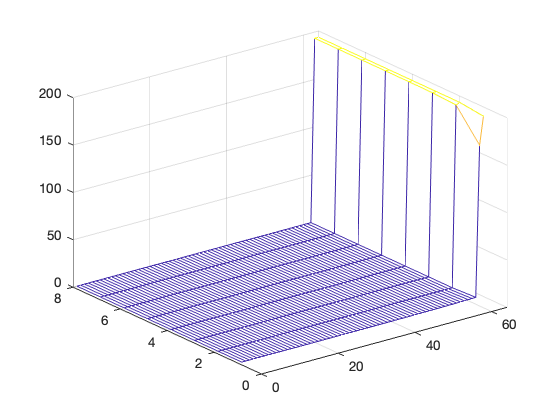

In [19]:
mesh(ev)

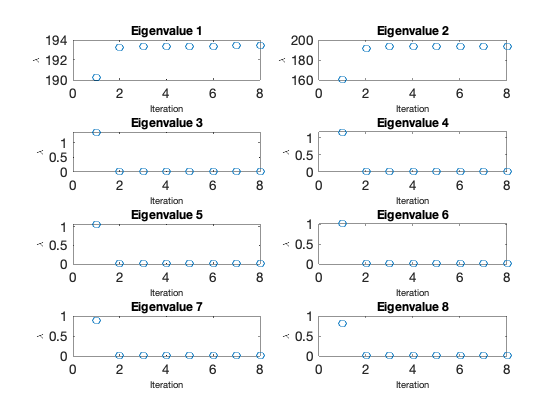

In [20]:
figure() ;
 for i = 1 : it
    subplot(4, 2, i) ;
    plot(ev(:,64-i+1),'o') ;
    title(strcat("Eigenvalue ",num2str(i)),'FontSize',9);
    xlabel('Iteration','FontSize',7) ;
    ylabel('\lambda','FontSize',7) ;
 end

In [21]:
[v, e] = eig(r*r');

In [22]:
size(v)

ans =
    64    64


#### First 10 eigenfucntions corresponding to 10 largest eigenvalues

In [23]:
size(v(:,end-9:end))

ans =
    64    10


In [24]:
%v(:,end-9:end)

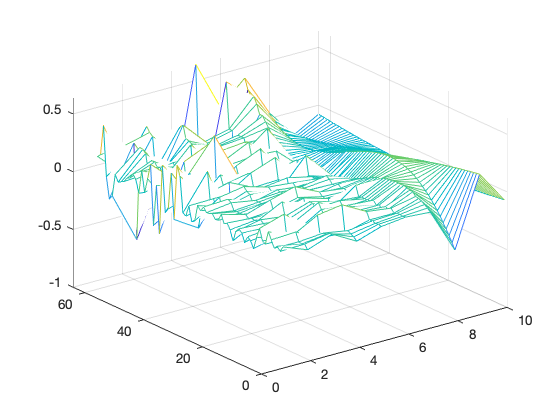

In [25]:
mesh(v(:,end-9:end))

In [26]:
eig_fn=v(:,end-9:end);

In [27]:
size(v)

ans =
    64    64


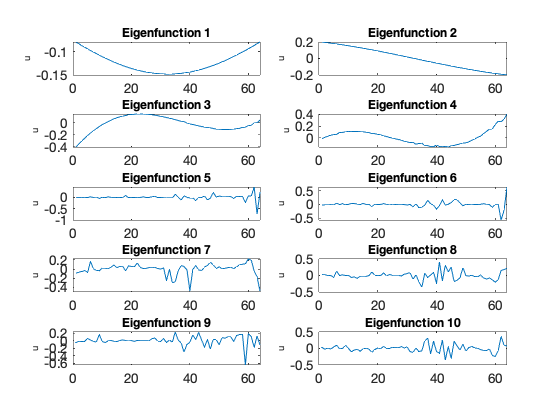

In [28]:
figure() ;
 for i = 1 : 10
    subplot(5, 2, i) ;
    plot(v(:,64-i+1)) ;
    title(strcat("Eigenfunction ",num2str(i)),'FontSize',9);
    xlabel('','FontSize',7) ;
    ylabel('u','FontSize',7) ;
 end

#### gappy data

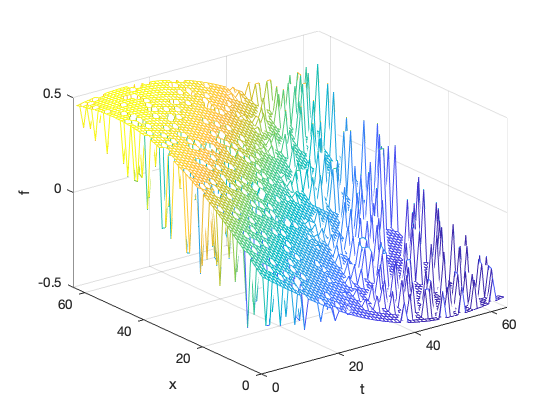

In [36]:
mesh(r1);
xlabel('t')
ylabel('x')
zlabel('f')

#### recovered data

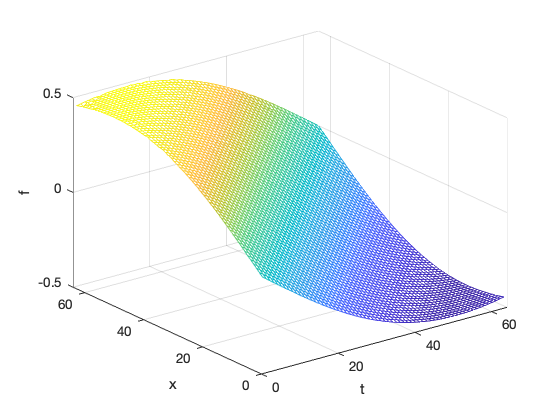

In [37]:
mesh(r);
xlabel('t')
ylabel('x')
zlabel('f')

#### original data

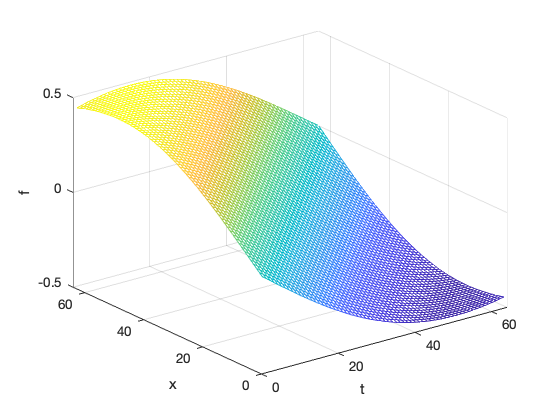

In [38]:
mesh(f)
xlabel('t')
ylabel('x')
zlabel('f')

#### error between original and recovered data

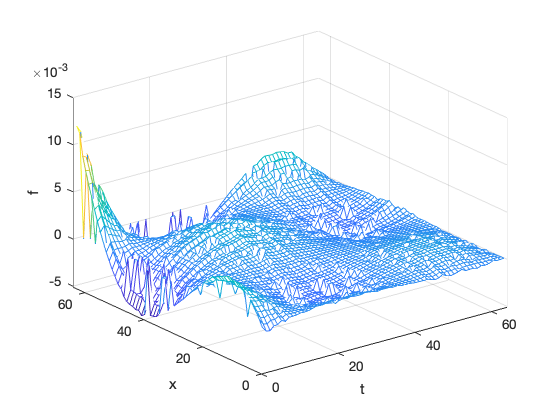

In [39]:
mesh(r-f);
xlabel('t')
ylabel('x')
zlabel('f')